In [ ]:
from utils import *

In [ ]:
df = get_processed_data_bertopic()
data = df['Processed Summary'].tolist()

In [ ]:
from octis.dataset.dataset import Dataset

dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis")

# Simple BERTopic

In [ ]:
from bertopic import BERTopic

In [5]:
topic_model = BERTopic(calculate_probabilities=True)
topics, probs = topic_model.fit_transform(data)
topic_info = topic_model.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info.iloc[0]['Count']}")

Number of topics: 387
Number of outliers: 13754


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

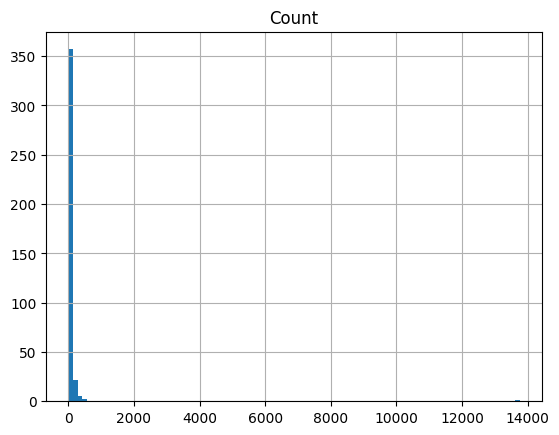

In [6]:
topic_info.hist(column='Count', bins=100)

In [7]:
model_output = get_bertopic_model_output(topic_model)

In [8]:
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -6.172067557325954
NPMI: 0.0795121681827968
C_V: 0.5546987219128335
Topic Diversity: 0.6462532299741602
Inverted RBO: 0.9963886165004319
Pairwise Jaccard: 0.0027529008512705328
KL Uniform: None
KL Vacuous: None
KL Background: 1.3369104398069989


# Reducing outliers

In [9]:
new_topics = topic_model.reduce_outliers(data, topics)
topic_model.update_topics(data, topics=new_topics)
topic_info = topic_model.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info.iloc[0]}")

2024-11-19 20:27:30,679 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


Number of topics: 386
Number of outliers: 560


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

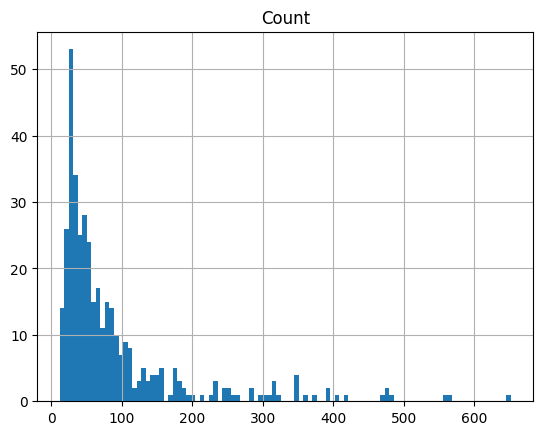

In [10]:
topic_info.hist(column='Count', bins=100)

In [11]:
model_output = get_bertopic_model_output(topic_model)

In [12]:
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -5.486193563352657
NPMI: 0.09446816832986273
C_V: 0.5796806544882305
Topic Diversity: 0.6158031088082901
Inverted RBO: 0.9959740195319101
Pairwise Jaccard: 0.0032548585622447527
KL Uniform: None
KL Vacuous: None
KL Background: 1.3369104398069989


# Auto topic number

In [13]:
topic_model_less_topics = BERTopic(calculate_probabilities=True, nr_topics="auto")
topics, probs = topic_model_less_topics.fit_transform(data)
topic_info = topic_model_less_topics.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info[topic_info['Topic'] == -1]['Count']}")

Number of topics: 103
Number of outliers: 0    13909
Name: Count, dtype: int64


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

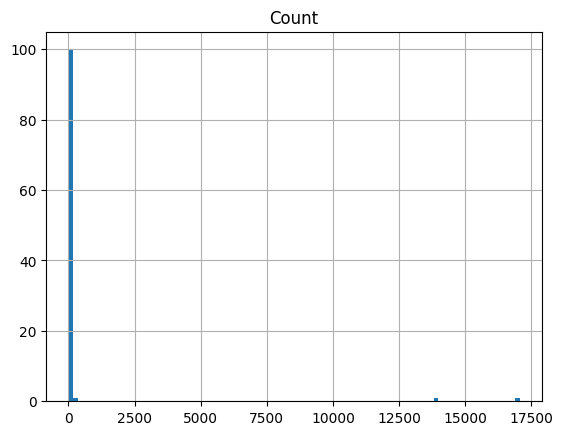

In [14]:
topic_info.hist(column='Count', bins=100)

In [15]:
model_output = get_bertopic_model_output(topic_model_less_topics)

In [16]:
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -5.304019168703258
NPMI: 0.08633875178899669
C_V: 0.5356901512928797
Topic Diversity: 0.8087378640776699
Inverted RBO: 0.995614940027621
Pairwise Jaccard: 0.003870630915238785
KL Uniform: None
KL Vacuous: None
KL Background: 3.218383183850171


# Reducing outliers

In [17]:
new_topics = topic_model_less_topics.reduce_outliers(data, topics)
topic_model_less_topics.update_topics(data, topics=new_topics)
topic_info = topic_model_less_topics.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info[topic_info['Topic'] == -1]['Count']}")

2024-11-19 20:40:04,967 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


Number of topics: 102
Number of outliers: Series([], Name: Count, dtype: int64)


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

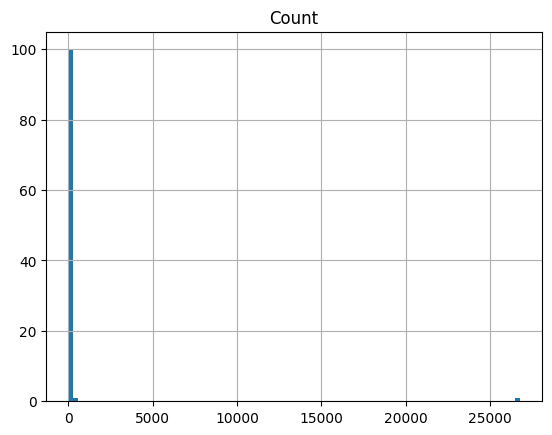

In [18]:
topic_info.hist(column='Count', bins=100)

In [20]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,0,26746,0_model_learning_method_task,"[model, learning, method, task, data, approach, performance, problem, network, language]","[advance digital technology classification medical image become crucial step clinical decision support system automatic medical image classification represents pivotal domain use ai hold potential create significant social impact however several challenge act obstacle development practical effective solution one challenge prevalent class imbalance problem medical imaging datasets result existing ai technique particularly methodology often underperform scenario study propose novel framework called large margin aware focal lmf loss mitigate class imbalance problem medical imaging lmf loss represents linear combination two loss function optimized two hyperparameters framework harness distinct characteristic loss function enforcing wider margin minority class simultaneously emphasizing challenging sample found datasets perform rigorous experiment three neural network architecture four medical imaging datasets provide empirical evidence proposed framework consistently outperforms baseline method showing improvement 2 score analysis f1 score also demonstrate proposed framework significantly improve performance minority class result experiment show proposed framework perform consistently well across different architecture datasets overall study demonstrates simple effective approach addressing class imbalance problem medical imaging datasets hope work inspire new research toward generalized approach medical image classification, recent time large language model llm made significant stride generating computer code blurring line code created human code produced artificial intelligence ai technology evolve rapidly crucial explore influence code generation especially given risk misuse area like higher education paper explores issue using advanced classification technique differentiate code written human generated chatgpt type llm employ new approach combine powerful embedding feature supervised learning algorithm including deep neural network random forest extreme gradient boosting achieve differentiation impressive accuracy 98 successful combination also examine model calibration showing model extremely well calibrated additionally present feature interpretable bayes classifier elucidate critical difference code source enhancing explainability transparency approach approach work well provide accuracy also show untrained human solve task better random guessing study crucial understanding mitigating potential risk associated using ai code generation particularly context higher education software development competitive programming, recent development neural language modeling led leap accuracy commonsense benchmark however increasing concern model overfit specific task without learning utilize external knowledge perform general semantic reasoning contrast evaluation shown promise robust measure model general reasoning ability paper propose novel framework question answering across commonsense task guided set hypothesis framework study transform various knowledge resource form effective model vary set language model training regime knowledge source data generation strategy measure impact across task extending prior work devise compare four constrained strategy provide empirical result across five commonsense task data generated five external knowledge resource show individual knowledge graph better suited specific task global knowledge graph brings consistent gain across different task addition preserving structure task well generating fair informative question help language model learn effectively]"
1,1,349,1_causal_causality_variable_effect,"[causal, causality, variable, effect, observational, discovery, cause, intervention, relationship, structure]","[many field scientific research application unbiased estimation causal effect data crucial understanding mec

In [19]:
model_output = get_bertopic_model_output(topic_model_less_topics)
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -4.307763226755346
NPMI: 0.10192969191140486
C_V: 0.5669481669767485
Topic Diversity: 0.7715686274509804
Inverted RBO: 0.9946013512200488
Pairwise Jaccard: 0.0049554536586421645
KL Uniform: None
KL Vacuous: None
KL Background: 3.218383183850171


# LDA

In [ ]:
from octis.models.LDA import LDA
model = LDA(num_topics=25)  # Create model
model_output = model.train_model(dataset) # Train the model
lda_metrics = calculate_metrics(model_output, dataset)

In [ ]:
lda_metrics